<a href="https://colab.research.google.com/github/machiwao/CCMACLRL_EXAM_COM222ML/blob/main/MidtermsExam_Foryasen%2CLim%2CMapanao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.feature_selection import RFE
from datetime import datetime
import re
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Data Preprocessing

In [438]:
df = pd.read_csv('train.csv')
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [440]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


## Tokenization

In [441]:
df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [442]:
def add_luxury_status(df):
    luxury_brands = ['Lexus',
    'Audi',
    'BMW',
    'Mercedes-Benz',
    'Jaguar',
    'Porsche',
    'Rolls-Royce',
    'Lamborghini',
    'Maserati',
    'Ferrari',
    'McLaren',
    'Bentley',
    'Tesla',
    'Cadillac',
    'McLaren',
    'Volvo',
    'Land Rover',
    'Genesis']

    df['luxury'] = df['brand'].apply(lambda brand: 'Luxury' if brand in luxury_brands else 'Non-Luxury')

    return df

In [443]:
df = add_luxury_status(df)
df.drop('model', axis=1, inplace=True)
df.head()

,id,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,luxury
0,0,MINI,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Non-Luxury
1,1,Lincoln,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Non-Luxury
2,2,Chevrolet,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Non-Luxury
3,3,Genesis,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Luxury
4,4,Mercedes-Benz,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Luxury


In [444]:
df['luxury'].value_counts()

,count
luxury,
Non-Luxury,106702
Luxury,81831


In [445]:
df['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841
2.0L I4 16V GDI DOHC Turbo,2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451
...,...
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid,1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability,1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel,1


In [446]:
def tokenize_engine(engine_text):
    horsepower_match = re.search(r'(\d+\.?\d*)HP', engine_text)
    horsepower = float(horsepower_match.group(1)) if horsepower_match else None

    engine_size_match = re.search(r'(\d+\.?\d*)L', engine_text)
    engine_size = float(engine_size_match.group(1)) if engine_size_match else None

    cylinders_match = re.search(r'(\d+) Cylinder', engine_text)
    cylinders = int(cylinders_match.group(1)) if cylinders_match else None

    return {
        "horsepower": horsepower,
        "engine_size": engine_size,
        "cylinders": cylinders,
    }

In [447]:
df['engine_tokenized'] = df['engine'].apply(tokenize_engine)

In [448]:
df['horsepower'] = df['engine_tokenized'].apply(lambda x: x['horsepower'])
df['engine_size'] = df['engine_tokenized'].apply(lambda x: x['engine_size'])
df['cylinders'] = df['engine_tokenized'].apply(lambda x: x['cylinders'])

In [449]:
df.drop(columns = ['engine_tokenized', 'engine'], inplace=True)

In [450]:
df.head()

,id,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,luxury,horsepower,engine_size,cylinders
0,0,MINI,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,Non-Luxury,172.0,1.6,4.0
1,1,Lincoln,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Non-Luxury,252.0,3.9,8.0
2,2,Chevrolet,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,Non-Luxury,320.0,5.3,8.0
3,3,Genesis,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Luxury,420.0,5.0,8.0
4,4,Mercedes-Benz,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,Luxury,208.0,2.0,4.0


In [451]:
df['transmission'].value_counts()

,count
transmission,
A/T,49904
8-Speed A/T,20645
Transmission w/Dual Shift Mode,19255
6-Speed A/T,18044
6-Speed M/T,11998
7-Speed A/T,11124
Automatic,10691
8-Speed Automatic,8431
10-Speed A/T,8044


In [452]:
def tokenize_transmission(transmission_text):
    transmission_type = 'Unknown'
    transmission_speeds = None

    speeds_match = re.search(r'(\d+)[ -]?[sS]peed', transmission_text)
    transmission_speeds = int(speeds_match.group(1)) if speeds_match else None

    if 'DCT' in transmission_text or 'At/Mt' in transmission_text or 'w/Dual Shift' in transmission_text:
        transmission_type = 'DCT'
    elif 'CVT' in transmission_text or 'CVT-F' in transmission_text:
        transmission_type = 'CVT'  # Continuously Variable Transmission
    elif 'A/T' in transmission_text or 'Automatic' in transmission_text or 'Overdrive' in transmission_text or 'AT' in transmission_text:
        transmission_type = 'Automatic'
    elif 'M/T' in transmission_text or 'Manual' in transmission_text or 'Mt' in transmission_text:
        transmission_type = 'Manual'

    return {
        "transmission_type": transmission_type,
        "transmission_speeds": transmission_speeds
    }

In [453]:
df['transmission_tokenized'] = df['transmission'].apply(tokenize_transmission)

In [454]:
df['transmission_type'] = df['transmission_tokenized'].apply(lambda x: x['transmission_type'])
df['transmission_speeds'] = df['transmission_tokenized'].apply(lambda x: x['transmission_speeds'])

In [455]:
df.drop(columns=['transmission_tokenized', 'transmission'], inplace=True)

In [456]:
df['transmission_speeds'].unique()

array([nan,  7.,  8., 10.,  1.,  6.,  9.,  5.,  4.,  2.])

In [457]:
df['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,165940
Hybrid,6832
E85 Flex Fuel,5406
Diesel,3955
–,781
Plug-In Hybrid,521
not supported,15


In [458]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [459]:
df['car_age'] = datetime.now().year - pd.to_numeric(df['model_year'], errors='coerce').astype('Int64')
df.drop('model_year', axis=1, inplace=True)
df.head()

,id,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,price,luxury,horsepower,engine_size,cylinders,transmission_type,transmission_speeds,car_age
0,0,MINI,213000,Gasoline,Yellow,Gray,None reported,Yes,4200,Non-Luxury,172.0,1.6,4.0,Automatic,NaN,17
1,1,Lincoln,143250,Gasoline,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Non-Luxury,252.0,3.9,8.0,Automatic,NaN,22
2,2,Chevrolet,136731,E85 Flex Fuel,Blue,Gray,None reported,Yes,13900,Non-Luxury,320.0,5.3,8.0,Automatic,NaN,22
3,3,Genesis,19500,Gasoline,Black,Black,None reported,Yes,45000,Luxury,420.0,5.0,8.0,DCT,NaN,7
4,4,Mercedes-Benz,7388,Gasoline,Black,Beige,None reported,Yes,97500,Luxury,208.0,2.0,4.0,Automatic,7.0,3


In [460]:
df.isnull().sum()

,0
id,0
brand,0
milage,0
fuel_type,5083
ext_col,0
int_col,0
accident,2452
clean_title,21419
price,0
luxury,0


In [461]:
df.drop(columns = ['id', 'ext_col', 'int_col'], inplace = True)

In [462]:
df.duplicated().sum()

540

In [463]:
df.drop_duplicates(inplace=True)

## Fill Missing Values

In [464]:
df['fuel_type'].replace({'not supported': 'Unknown', '–': 'Unknown'}, inplace=True)

df['fuel_type'].fillna('Unknown', inplace=True)
df['accident'].fillna('None reported', inplace=True)
df['clean_title'].fillna('unknown', inplace=True)

In [465]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Unknown', 'Hybrid', 'Diesel',
       'Plug-In Hybrid'], dtype=object)

In [466]:
df.isnull().sum()

,0
brand,0
milage,0
fuel_type,0
accident,0
clean_title,0
price,0
luxury,0
horsepower,33094
engine_size,14104
cylinders,37676


In [467]:
mode_result = stats.mode(df['cylinders'].dropna())
mode_cylinders = mode_result.mode if isinstance(mode_result.mode, np.ndarray) and len(mode_result.mode) > 0 else mode_result.mode

df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['engine_size'].fillna(df['engine_size'].mean(), inplace=True)
df['cylinders'].fillna(mode_cylinders, inplace=True)

In [468]:
mode_result = stats.mode(df['transmission_speeds'].dropna())
mode_transmission_speeds = mode_result.mode if isinstance(mode_result.mode, np.ndarray) and len(mode_result.mode) > 0 else mode_result.mode

df['transmission_speeds'].fillna(mode_transmission_speeds, inplace=True)

In [469]:
df.isnull().sum()

,0
brand,0
milage,0
fuel_type,0
accident,0
clean_title,0
price,0
luxury,0
horsepower,0
engine_size,0
cylinders,0


In [470]:
df.drop_duplicates(inplace=True)

In [471]:
df.duplicated().sum()

0

In [472]:
df['accident'].value_counts()

,count
accident,
None reported,146422
At least 1 accident or damage reported,41495


In [473]:
df['clean_title'].value_counts()

,count
clean_title,
Yes,166629
unknown,21288


# One-Hot Encoding

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187917 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   brand                187917 non-null  object 
 1   milage               187917 non-null  int64  
 2   fuel_type            187917 non-null  object 
 3   accident             187917 non-null  object 
 4   clean_title          187917 non-null  object 
 5   price                187917 non-null  int64  
 6   luxury               187917 non-null  object 
 7   horsepower           187917 non-null  float64
 8   engine_size          187917 non-null  float64
 9   cylinders            187917 non-null  float64
 10  transmission_type    187917 non-null  object 
 11  transmission_speeds  187917 non-null  float64
 12  car_age              187917 non-null  Int64  
dtypes: Int64(1), float64(4), int64(2), object(6)
memory usage: 20.3+ MB


In [475]:
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['transmission_type'] = le.fit_transform(df['transmission_type'])

In [476]:
categorical_dummy = ['accident', 'clean_title', 'luxury']
df = pd.get_dummies(df, columns=categorical_dummy, drop_first=True)

In [477]:
df.head()

,brand,milage,fuel_type,price,horsepower,engine_size,cylinders,transmission_type,transmission_speeds,car_age,accident_None reported,clean_title_unknown,luxury_Non-Luxury
0,31,213000,2,4200,172.0,1.6,4.0,0,6.0,17,True,False,True
1,28,143250,2,4999,252.0,3.9,8.0,0,6.0,22,False,False,True
2,9,136731,1,13900,320.0,5.3,8.0,0,6.0,22,True,False,True
3,16,19500,2,45000,420.0,5.0,8.0,2,6.0,7,True,False,False
4,36,7388,2,97500,208.0,2.0,4.0,0,7.0,3,True,False,False


## Feature Scaling

In [478]:
numerical_features = ['milage', 'horsepower', 'engine_size',
                      'cylinders', 'car_age', 'transmission_speeds']
scaler = RobustScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,brand,milage,fuel_type,price,horsepower,engine_size,cylinders,transmission_type,transmission_speeds,car_age,accident_None reported,clean_title_unknown,luxury_Non-Luxury
0,31,2.178701,2,4200,-1.488853,-1.2500,-1.0,0,0.0,1.428571,True,False,True
1,28,1.199643,2,4999,-0.793201,0.1875,1.0,0,0.0,2.142857,False,False,True
2,9,1.108138,1,13900,-0.201896,1.0625,1.0,0,0.0,2.142857,True,False,True
3,16,-0.537394,2,45000,0.667669,0.8750,1.0,2,0.0,0.000000,True,False,False
4,36,-0.707406,2,97500,-1.175809,-1.0000,-1.0,0,1.0,-0.571429,True,False,False


# Exploratory Data Analysis

In [479]:
for label in df.columns[:-1]:
  mean_prices = df.groupby(label)['price'].mean().reset_index(name='mean_price')
  mean_prices.sort_values(by='mean_price', ascending=False, inplace=True)
  print(mean_prices)

    brand     mean_price
6       6  169600.000000
25     25  159025.271375
46     46  135488.650624
5       5  128691.804042
35     35  122427.628099
13     13  116751.005571
2       2  112364.588235
45     45   80978.768836
43     43   70742.197414
30     30   63310.362319
32     32   61380.120726
52     52   56436.846917
16     16   53573.481366
33     33   53566.333333
26     26   53300.277567
1       1   51993.095308
44     44   51303.112683
36     36   51270.340314
21     21   48196.126900
8       8   45640.502145
4       4   43705.471472
9       9   41816.120657
41     41   41754.857143
3       3   41070.959436
14     14   40534.950670
15     15   38979.888854
24     24   38114.434137
23     23   37384.176471
27     27   34810.699154
56     56   34664.000000
22     22   34108.509408
20     20   33367.489140
11     11   33280.908626
12     12   31045.886364
55     55   30897.604716
28     28   30727.612810
51     51   30124.750000
7       7   29628.916933
39     39   29252.861472


In [480]:
df.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
horsepower,0.214308
accident_None reported,0.125124
transmission_speeds,0.113273
engine_size,0.094276
clean_title_unknown,0.089588
cylinders,0.087230
fuel_type,0.037975
brand,0.017533
transmission_type,-0.015270


In [481]:
df.corr()['price'].abs().sort_values(ascending=False)

,price
price,1.000000
milage,0.282926
car_age,0.231751
horsepower,0.214308
accident_None reported,0.125124
transmission_speeds,0.113273
engine_size,0.094276
luxury_Non-Luxury,0.092300
clean_title_unknown,0.089588
cylinders,0.087230


In [482]:
# sns.pairplot(df)

In [483]:
# sns.heatmap(df.corr(), annot=True)

# Training the Model

In [495]:
X = df.drop(columns = ['price', 'brand'], axis=1)
y = df['price']

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=466)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150333, 11) (37584, 11) (150333,) (37584,)


In [497]:
model = LinearRegression()

In [498]:
model.fit(X_train, y_train)

LinearRegression()

# Model Testing and Metrics

In [499]:
y_pred = model.predict(X_test)

In [500]:
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.15663553826831167
Mean Squared Error: 55760.059063502296


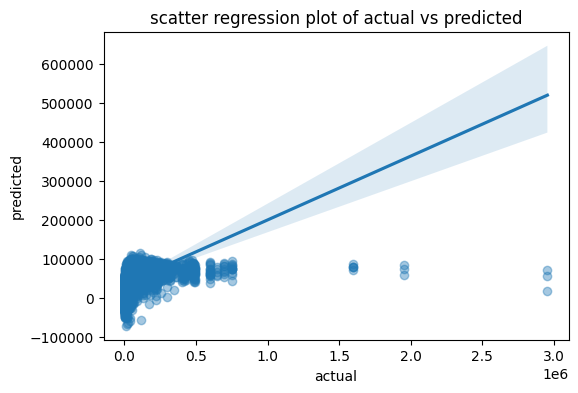

In [501]:
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=y_pred, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Submission Bin

In [494]:
dt = pd.read_csv('test.csv')
dt.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [502]:
dt = add_luxury_status(dt)
dt.drop('model', axis=1, inplace=True)
dt.head()

,id,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,luxury
0,188533,Land,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,Non-Luxury
1,188534,Land,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,Non-Luxury
2,188535,Ford,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN,Non-Luxury
3,188536,Audi,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN,Luxury
4,188537,Audi,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,Luxury


In [505]:
dt['engine_tokenized'] = dt['engine'].apply(tokenize_engine)

In [506]:
dt['horsepower'] = dt['engine_tokenized'].apply(lambda x: x['horsepower'])
dt['engine_size'] = dt['engine_tokenized'].apply(lambda x: x['engine_size'])
dt['cylinders'] = dt['engine_tokenized'].apply(lambda x: x['cylinders'])

In [507]:
dt.drop(columns = ['engine_tokenized', 'engine'], inplace=True)

In [508]:
dt['transmission_tokenized'] = dt['transmission'].apply(tokenize_transmission)

In [509]:
dt['transmission_type'] = dt['transmission_tokenized'].apply(lambda x: x['transmission_type'])
dt['transmission_speeds'] = dt['transmission_tokenized'].apply(lambda x: x['transmission_speeds'])

In [510]:
dt.drop(columns=['transmission_tokenized', 'transmission'], inplace=True)

In [511]:
dt['car_age'] = datetime.now().year - pd.to_numeric(dt['model_year'], errors='coerce').astype('Int64')
dt.drop('model_year', axis=1, inplace=True)
dt.head()

,id,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,luxury,horsepower,engine_size,cylinders,transmission_type,transmission_speeds,car_age
0,188533,Land,98000,Gasoline,White,Beige,None reported,Yes,Non-Luxury,240.0,2.0,4.0,Automatic,6.0,9
1,188534,Land,9142,Hybrid,Silver,Black,None reported,Yes,Non-Luxury,395.0,3.0,6.0,Automatic,8.0,4
2,188535,Ford,28121,Gasoline,White,Ebony,None reported,NaN,Non-Luxury,NaN,3.5,NaN,Automatic,10.0,2
3,188536,Audi,61258,Gasoline,Silician Yellow,Black,None reported,NaN,Luxury,NaN,NaN,NaN,Automatic,NaN,8
4,188537,Audi,59000,Gasoline,Gray,Black,None reported,Yes,Luxury,252.0,2.0,4.0,Automatic,NaN,6


In [512]:
dt.drop(columns = ['id', 'ext_col', 'int_col'], inplace = True)

In [513]:
dt['fuel_type'].replace({'not supported': 'Unknown', '–': 'Unknown'}, inplace=True)

dt['fuel_type'].fillna('Unknown', inplace=True)
dt['accident'].fillna('None reported', inplace=True)
dt['clean_title'].fillna('unknown', inplace=True)

In [514]:
dt.isnull().sum()

,0
brand,0
milage,0
fuel_type,0
accident,0
clean_title,0
luxury,0
horsepower,22181
engine_size,9407
cylinders,25150
transmission_type,0


In [515]:
mode_result = stats.mode(dt['cylinders'].dropna())
mode_cylinders = mode_result.mode if isinstance(mode_result.mode, np.ndarray) and len(mode_result.mode) > 0 else mode_result.mode

dt['horsepower'].fillna(dt['horsepower'].mean(), inplace=True)
dt['engine_size'].fillna(dt['engine_size'].mean(), inplace=True)
dt['cylinders'].fillna(mode_cylinders, inplace=True)

In [516]:
mode_result = stats.mode(dt['transmission_speeds'].dropna())
mode_transmission_speeds = mode_result.mode if isinstance(mode_result.mode, np.ndarray) and len(mode_result.mode) > 0 else mode_result.mode

dt['transmission_speeds'].fillna(mode_transmission_speeds, inplace=True)

In [517]:
dt['brand'] = le.fit_transform(dt['brand'])
dt['fuel_type'] = le.fit_transform(dt['fuel_type'])
dt['transmission_type'] = le.fit_transform(dt['transmission_type'])

In [518]:
categorical_dummy = ['accident', 'clean_title', 'luxury']
dt = pd.get_dummies(dt, columns=categorical_dummy, drop_first=True)

In [519]:
dt[numerical_features] = scaler.fit_transform(dt[numerical_features])
dt.head()

,brand,milage,fuel_type,horsepower,engine_size,cylinders,transmission_type,transmission_speeds,car_age,accident_None reported,clean_title_unknown,luxury_Non-Luxury
0,26,0.568038,2,-0.893889,-1.00000,-1.0,0,0.0,0.285714,True,False,True
1,26,-0.678252,3,0.453937,-0.37500,0.0,0,1.0,-0.428571,True,False,True
2,14,-0.412059,2,0.000000,-0.06250,0.0,0,2.0,-0.714286,True,True,True
3,3,0.052708,2,0.000000,0.12594,0.0,0,0.0,0.142857,True,True,False
4,3,0.021038,2,-0.789542,-1.00000,-1.0,0,0.0,-0.142857,True,False,False


In [525]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)
sf.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


In [526]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   brand                   125690 non-null  int64  
 1   milage                  125690 non-null  float64
 2   fuel_type               125690 non-null  int64  
 3   horsepower              125690 non-null  float64
 4   engine_size             125690 non-null  float64
 5   cylinders               125690 non-null  float64
 6   transmission_type       125690 non-null  int64  
 7   transmission_speeds     125690 non-null  float64
 8   car_age                 125690 non-null  float64
 9   accident_None reported  125690 non-null  bool   
 10  clean_title_unknown     125690 non-null  bool   
 11  luxury_Non-Luxury       125690 non-null  bool   
dtypes: bool(3), float64(6), int64(3)
memory usage: 9.0 MB


In [527]:
id = sf.pop('id')
y_pred = model.predict(dt.drop(columns = ['brand'], axis=1))

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'class': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
